In [3]:
import os
import sys
import pyspark
from pyspark.sql import SQLContext
import pandas as pd
from pyspark import SparkContext, SparkConf
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('GCSFilesRead').getOrCreate()
spark.conf.set("spark.sql.debug.maxToStringFields", 1000)

In [4]:
from google.cloud import storage

gcs_client = storage.Client()
bucket = gcs_client.bucket('datasetsbdp')


In [3]:
#spark._jsc.hadoopConfiguration().set("google.cloud.auth.service.account.json.keyfile","/Users/xiantang/Desktop/BigDataPlatform/Project/yelp_dataset/iconic-being-343500-f1cb28ff8582.json")


In [5]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/xiantang/Desktop/BigDataPlatform/Project/yelp_dataset/iconic-being-343500-f1cb28ff8582.json"


In [5]:
!hdfs dfs -ls 'gs://datasetsbdp/'


ls: Error reading credential file from environment variable GOOGLE_APPLICATION_CREDENTIALS, value '/Users/xiantang/Desktop/BigDataPlatform/Project/yelp_dataset/iconic-being-343500-f1cb28ff8582.json': File does not exist.


In [6]:
PROJECT_ID="BDPYelpFinalProject"
bucket_name = "datasetsbdp"
path_review = f"gs://{bucket_name}/dataset_review.json"
path_tip = f"gs://{bucket_name}/dataset_tip.json"
path_user = f"gs://{bucket_name}/dataset_user.json"
path_checkin = f"gs://{bucket_name}/dataset_checkin.json"
path_business = f"gs://{bucket_name}/dataset_business.json"
path_train1 = f"gs://{bucket_name}/train1.csv"
path_train2 = f"gs://{bucket_name}/train2.csv"
path_review_test = f"gs://{bucket_name}/test_no_label.csv"
#gs://bdpproject/yelp_academic_dataset_review.json

## For df_review: stars column only have 1~5: 5 distinct numbers.

In [7]:
df_review=spark.read.json(path_review)
df_review.show(5)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

In [8]:
df_review.count()

6990280

In [8]:
df_review.select('stars').distinct().show()

+-----+
|stars|
+-----+
|  1.0|
|  4.0|
|  3.0|
|  2.0|
|  5.0|
+-----+



In [10]:
df_tip = spark.read.json(path_tip)
df_tip.show(5)

+--------------------+----------------+-------------------+--------------------+--------------------+
|         business_id|compliment_count|               date|                text|             user_id|
+--------------------+----------------+-------------------+--------------------+--------------------+
|3uLgwr0qeCNMjKenH...|               0|2012-05-18 02:17:21|Avengers time wit...|AGNUgVwnZUey3gcPC...|
|QoezRbYQncpRqyrLH...|               0|2013-02-05 18:35:10|They have lots of...|NBN4MgHP9D3cw--Sn...|
|MYoRNLb5chwjQe3c_...|               0|2013-08-18 00:56:08|It's open even wh...|-copOvldyKh1qr-vz...|
|hV-bABTK-glh5wj31...|               0|2017-06-27 23:05:38|Very decent fried...|FjMQVZjSqY8syIO-5...|
|_uN0OudeJ3Zl_tf6n...|               0|2012-10-06 19:43:09|Appetizers.. plat...|ld0AperBXk1h6Ubqm...|
+--------------------+----------------+-------------------+--------------------+--------------------+
only showing top 5 rows



In [11]:
df_tip.select('compliment_count').distinct().show()

+----------------+
|compliment_count|
+----------------+
|               0|
|               5|
|               6|
|               1|
|               3|
|               2|
|               4|
+----------------+



In [12]:
df_user = spark.read.json(path_user)
df_user.show(5)

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer| cool|               elite|fans|             friends|funny|  name|review_count|useful|             user_id|      yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|         3.91|    

In [ ]:
df_user.show()

In [13]:
df_checkin = spark.read.json(path_checkin)
df_checkin.show(5)

+--------------------+--------------------+
|         business_id|                date|
+--------------------+--------------------+
|---kPU91CF4Lq2-Wl...|2020-03-13 21:10:...|
|--0iUa4sNDFiZFrAd...|2010-09-13 21:43:...|
|--30_8IhuyMHbSOcN...|2013-06-14 23:29:...|
|--7PUidqRWpRSpXeb...|2011-02-15 17:12:...|
|--7jw19RH9JKXgFoh...|2014-04-21 20:42:...|
+--------------------+--------------------+
only showing top 5 rows



In [10]:
df_business = spark.read.json(path_business)
df_business.show(5)

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{null, null, null...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|                null|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|       Affton|{8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695|    

## cleaning df_business 

In [56]:
df_business.printSchema()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [8]:
df_business=df_business.select('business_id','name','city','stars','review_count','categories')

In [9]:
df_business.show(2)

+--------------------+--------------------+-------------+-----+------------+--------------------+
|         business_id|                name|         city|stars|review_count|          categories|
+--------------------+--------------------+-------------+-----+------------+--------------------+
|Pns2l4eNsfO8kk83d...|Abby Rappoport, L...|Santa Barbara|  5.0|           7|Doctors, Traditio...|
|mpf3x-BjTdTEA3yCZ...|       The UPS Store|       Affton|  3.0|          15|Shipping Centers,...|
+--------------------+--------------------+-------------+-----+------------+--------------------+
only showing top 2 rows



# Cleaning df_review

In [45]:
df_review=df_review.select('business_id','date','stars','text','user_id')

In [46]:
df_review.show(2)

+--------------------+-------------------+-----+--------------------+--------------------+
|         business_id|               date|stars|                text|             user_id|
+--------------------+-------------------+-----+--------------------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|2018-07-07 22:09:11|  3.0|If you decide to ...|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|2012-01-03 15:28:18|  5.0|I've taken a lot ...|OyoGAe7OKpv6SyGZT...|
+--------------------+-------------------+-----+--------------------+--------------------+
only showing top 2 rows



## EDA

### Find Out Factors that Influence the Star Rating

In [52]:
ratingFactor = spark.read.json(path_business)

In [53]:
# Read specific factors
ratingFactor = ratingFactor.select("attributes","stars")
#ratingFactor.printSchema()

In [54]:
# show selected factors
factors = ratingFactor.select(F.col("attributes.WheelchairAccessible").alias("WheelChairAccessible"),
                             F.col("attributes.WiFi").alias("WiFi"),
                              F.col("attributes.HasTV").alias("TV"),
                              F.col("attributes.DriveThru").alias("DriveThru"),
                             F.col("attributes.Smoking").alias("Smoking"),
                             F.col("attributes.RestaurantsDelivery").alias("Delivery"),
                             F.col("attributes.DogsAllowed").alias("DogsAllowed"),
                             F.col("attributes.GoodForKids").alias("GoodForKids"),F.col("stars"))
#drop null rows
factors = factors.na.drop()
#factors.show(5)

In [55]:
from pyspark.sql.functions import when

#unify types of WiFi
factor_clean = factors.withColumn("WiFi", when(factors.WiFi == "u'no'","NoWiFi") \
      .when(factors.WiFi == "u'free'","FreeWiFi") \
    .when(factors.WiFi == "free'","FreeWiFi") \
    .when(factors.WiFi == "no'","NoWiFi") \
     .when(factors.WiFi == "None","NotMentioned") \
    .when(factors.WiFi == "u'paid'","PaidWiFi") \
    .when(factors.WiFi == "paid'","PaidWiFi") \
    .when(factors.WiFi == "'free'","FreeWiFi") \
     .when(factors.WiFi == "'paid'","PaidWiFi") \
    .when(factors.WiFi == "'no'","NoWiFi") \
      .otherwise(factors.WiFi)) \
    .withColumn("DriveThru", when(factors.DriveThru == "None","NotMentioned") \
      .when(factors.DriveThru == "False","NoDriveThru") \
    .when(factors.DriveThru == "True","DriveThru") \
      .otherwise(factors.DriveThru)) \
    .withColumn("Smoking", when(factors.Smoking == "u'outdoor'","Smoking") \
    .when(factors.Smoking == "u'no'","NoSmoking") \
    .when(factors.Smoking == "u'yes'","Smoking") \
    .when(factors.Smoking == "'no'","NoSmoking") \
      .otherwise(factors.Smoking)) \
    .withColumn("WheelChairAccessible", when(factors.WheelChairAccessible == "True","WheelChair") \
      .when(factors.WheelChairAccessible == "False","NoWheelChair") \
      .otherwise(factors.WheelChairAccessible)) \
    .withColumn("TV", when(factors.TV == "True","HasTV") \
      .when(factors.TV == "False","NoTV") \
      .otherwise(factors.TV)) \
    .withColumn("Delivery", when(factors.Delivery == "True","Delivery") \
      .when(factors.Delivery == "False","NoDelivery") \
    .when(factors.Delivery == "None","NotMentioned") \
      .otherwise(factors.Delivery)) \
    .withColumn("DogsAllowed", when(factors.DogsAllowed == "True","DogsAllowed") \
      .when(factors.DogsAllowed == "False","DogsNotAllowed") \
      .otherwise(factors.DogsAllowed)) \
    .withColumn("GoodForKids", when(factors.GoodForKids == "True","GoodForKids") \
      .when(factors.GoodForKids == "False","NotGoodForKids") \
      .otherwise(factors.GoodForKids)) 

#convert to pandas dataframe
factor_clean_pd = factor_clean.toPandas()


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


### Relationship Between Factors and Star Ratings

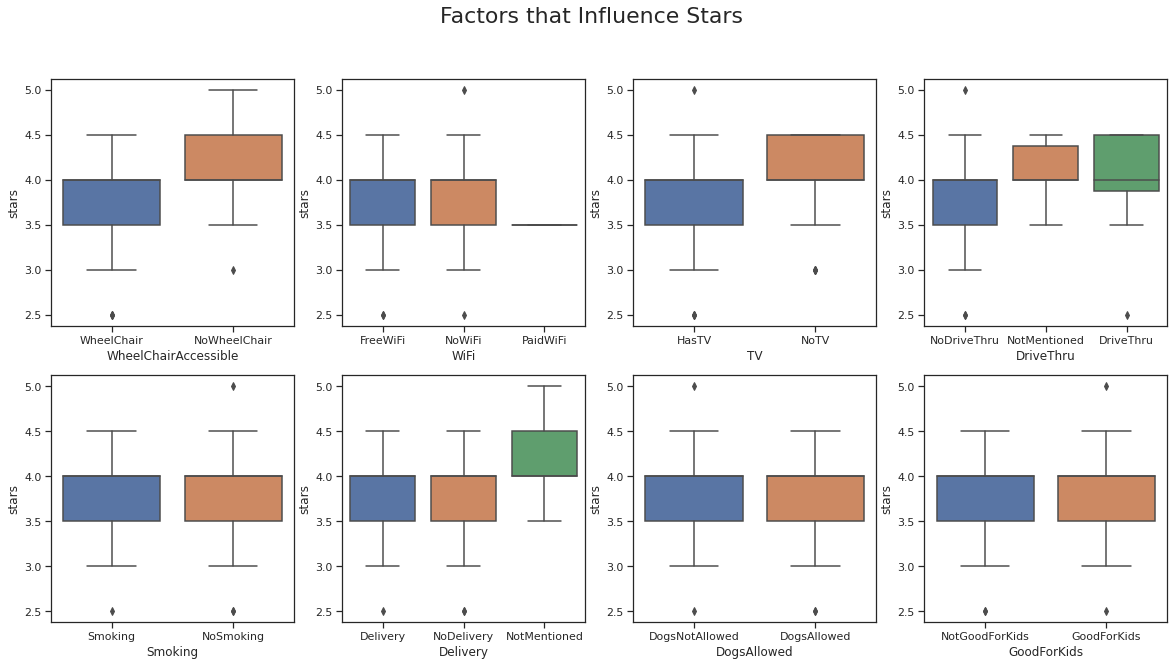

In [57]:
fig, axs = plt.subplots (2, 4, figsize=(20, 10))

fig.suptitle('Factors that Influence Stars',fontsize = 22)

sns.boxplot(x='WheelChairAccessible', y='stars', data=factor_clean_pd, ax=axs[0,0])
sns.boxplot(x='WiFi', y='stars', data=factor_clean_pd, ax=axs[0,1])
sns.boxplot(x='TV', y='stars', data=factor_clean_pd, ax=axs[0,2])
sns.boxplot(x='DriveThru', y='stars', data=factor_clean_pd, ax=axs[0,3])
sns.boxplot(x='Smoking', y='stars', data=factor_clean_pd, ax=axs[1,0])
sns.boxplot(x='Delivery', y='stars', data=factor_clean_pd, ax=axs[1,1])
sns.boxplot(x='DogsAllowed', y='stars', data=factor_clean_pd, ax=axs[1,2])
sns.boxplot(x='GoodForKids', y='stars', data=factor_clean_pd, ax=axs[1,3])
plt.close(8)

In [58]:
# Build lineaer regression model
from sklearn.linear_model import LinearRegression

factor_x = factor_clean_pd.loc[:, factor_clean_pd.columns != 'stars']

# Creating dummy variables:
factor_x = pd.get_dummies(factor_x).apply(pd.to_numeric, errors='coerce')

factor_y = factor_clean_pd['stars'].apply(pd.to_numeric, errors='coerce')

### Top 5 Factors that Influence Star Ratings the Most

In [59]:
# Model intercepts

model = LinearRegression().fit(factor_x, factor_y)
factor_list = list(factor_x)
factor_influence=pd.DataFrame({'Factors':factor_list, 'Coefficients':model.coef_}).sort_values(by=['Coefficients'], ascending = False)
factor_influence.head(10)

,Factors,Coefficients
10,Smoking_NoSmoking,1.694488e+14
11,Smoking_Smoking,1.694488e+14
4,WiFi_PaidWiFi,1.223902e+14
2,WiFi_FreeWiFi,1.223902e+14
3,WiFi_NoWiFi,1.223902e+14
15,DogsAllowed_DogsAllowed,8.732079e+13
16,DogsAllowed_DogsNotAllowed,8.732079e+13
14,Delivery_NotMentioned,2.693732e+13
12,Delivery_Delivery,2.693732e+13
13,Delivery_NoDelivery,2.693732e+13


## Identify Fake Reviews with Cross Validation

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from pyspark.ml import Pipeline
from pyspark.sql.functions import *
import pyspark.sql.functions as F
import pandas as pd

In [9]:
# read the training and testing dataset into dataframe
df_train=spark.read.option("header",True). \
    option("multiLine",True).option("escape","\'").csv(path_train1)

df_test=spark.read.option("header",True). \
    option("multiLine",True).option("escape","\'").csv(path_train2)

22/03/13 20:51:36 WARN org.apache.hadoop.util.concurrent.ExecutorHelper: Thread (Thread[GetFileInfo #0,5,main]) interrupted: 
java.lang.InterruptedException
	at com.google.common.util.concurrent.AbstractFuture.get(AbstractFuture.java:510)
	at com.google.common.util.concurrent.FluentFuture$TrustedFuture.get(FluentFuture.java:88)
	at org.apache.hadoop.util.concurrent.ExecutorHelper.logThrowableFromAfterExecute(ExecutorHelper.java:48)
	at org.apache.hadoop.util.concurrent.HadoopThreadPoolExecutor.afterExecute(HadoopThreadPoolExecutor.java:90)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
22/03/13 20:51:36 WARN org.apache.hadoop.util.concurrent.ExecutorHelper: Thread (Thread[GetFileInfo #1,5,main]) interrupted: 
java.lang.InterruptedException
	at com.google.common.util.concurrent.AbstractFuture.get(AbstractFuture.java:510)
	at c

In [12]:
# label = 1 means fake reviews, and label = 0 for genuine reviews 
df_train.count()

250804

### EDA with Labeled Fake Review Dataset

In [16]:
label_count = df_train.groupby('label').count().toPandas()
label_count.head(2)

,label,count
0,0,225003
1,1,25801


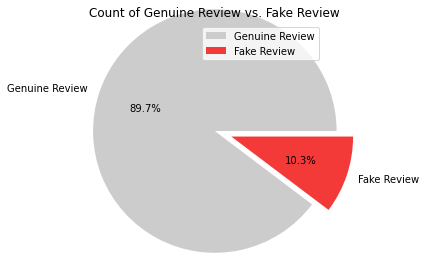

In [17]:
from matplotlib import pyplot as plt
label_name = ['Genuine Review','Fake Review']
colors = ["#CCCCCC","#F43939"]
explode = (0,0.2)
plt.pie(label_count['count'], explode = explode, labels = label_name, colors = colors, radius = 1.4, autopct = '%1.1f%%')
plt.legend()
plt.title("Count of Genuine Review vs. Fake Review")
plt.show()

### Since the dataset is imbalanced, we need to perform SMOTE (Synthetic Minority Oversampling TEchnique) to balance data.

# Fake Review Detection 

In [13]:
df_train = df_train.drop(*("ex_id","user_id","prod_id","rating","date"))
df_test  = df_test.drop(*("ex_id","user_id","prod_id","rating","date"))

In [14]:
def wordopt(df):
  #  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    df = df.withColumn("review", regexp_replace(col("review"), '\[.*?\]', " "))     
    df = df.withColumn("review", regexp_replace(col("review"), "\\W", " "))   
    df = df.withColumn("review", regexp_replace(col("review"), 'https?://\S+|www\.\S+', " "))   
    df = df.withColumn("review", regexp_replace(col("review"), '<.*?>+', " "))       
    df = df.withColumn("review", regexp_replace(col("review"), '\n', " "))    
    df = df.withColumn("review", regexp_replace(col("review"), '\w*\d\w*', " "))
    df = df.select("label", lower(col("review")).alias("review"))
    df = df.withColumn("review", regexp_replace(col("review"), "[^A-Za-z]", " "))
    return df

In [15]:
df_train2 = wordopt(df_train)
df_test2 = wordopt(df_test)

In [16]:
df_train2.show(5)

+-----+--------------------+
|label|              review|
+-----+--------------------+
|    1|the food at snack...|
|    1|this little place...|
|    1|ordered lunch for...|
|    1|this is a beautif...|
|    1| snack is great p...|
+-----+--------------------+
only showing top 5 rows



In [17]:
#df_train = df_train.withColumn("review", regexp_replace(col("review"), "[^A-Za-z]", " "))
#df_test = df_test.withColumn("review", regexp_replace(col("review"), "[^A-Za-z]", " "))

In [18]:
df_train2 =  df_train2.withColumnRenamed("label","is_fake")
df_test2 =  df_test2.withColumnRenamed("label","is_fake")

In [19]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import Word2Vec
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.feature import HashingTF, IDF

tokenizer = Tokenizer(inputCol="review", outputCol="words")  #tokenize words
remover = StopWordsRemover(inputCol="words", outputCol="filtered")  #remove stop words
word2Vec = Word2Vec(vectorSize=100, inputCol="filtered", outputCol="features")
indexer = StringIndexer(inputCol="is_fake", outputCol="label") 

In [20]:
pipeline = Pipeline(stages=[tokenizer, remover, word2Vec, indexer])
train = pipeline.fit(df_train2).transform(df_train2)
train = train.drop(*("review", "words"))

22/03/13 21:02:17 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/03/13 21:02:17 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [21]:
pipeline = Pipeline(stages=[tokenizer, remover, word2Vec, indexer])
test = pipeline.fit(df_test2).transform(df_test2)
test = test.drop(*("review", "words"))

In [23]:
test.show(5)

+-------+--------------------+--------------------+-----+
|is_fake|            filtered|            features|label|
+-------+--------------------+--------------------+-----+
|      1|[around, good, pl...|[0.00328197547545...|  1.0|
|      0|[lunch, , friend,...|[0.07813010432772...|  0.0|
|      0|[good, big, greek...|[-0.0458766429219...|  0.0|
|      0|[, , , may, notic...|[0.08775192833993...|  0.0|
|      0|[, understand, wh...|[-0.0631564646693...|  0.0|
+-------+--------------------+--------------------+-----+
only showing top 5 rows



## Oversampling 

In [24]:
major_df = train.filter(col("label") == 0)
minor_df = train.filter(col("label") == 1)
ratio = int(major_df.count()/minor_df.count())

In [25]:
a = range(ratio)
# duplicate the minority rows
oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')
# combine both oversampled minority rows and previous majority rows 
combined_df = major_df.unionAll(oversampled_df)
combined_df.show(5)

+-------+--------------------+--------------------+-----+
|is_fake|            filtered|            features|label|
+-------+--------------------+--------------------+-----+
|      0|[braised, lamb, s...|[0.01540724855294...|  0.0|
|      0|[, spot, close, j...|[-0.0089674222334...|  0.0|
|      0|[, needed, quick,...|[0.03909747155323...|  0.0|
|      0|[artichoke, chick...|[-0.0118724666535...|  0.0|
|      0|[needed, quick, b...|[0.05870454307072...|  0.0|
+-------+--------------------+--------------------+-----+
only showing top 5 rows



In [34]:
combined_df.groupby('label').count().show()

+-----+------+
|label| count|
+-----+------+
|  0.0|225003|
|  1.0|206408|
+-----+------+



## UnderSampling

In [103]:
major_df = train.filter(col("label") == 0)
minor_df = train.filter(col("label") == 1)
ratio = major_df.count()/minor_df.count()

In [104]:
sampled_majority_df = major_df.sample(False, 1/ratio)
combined_df_2 = sampled_majority_df.unionAll(minor_df)
combined_df_2.show()

+-------+--------------------+--------------------+-----+
|is_fake|            filtered|            features|label|
+-------+--------------------+--------------------+-----+
|      0|[needed, quick, b...|[0.05870454307072...|  0.0|
|      0|[taramosalata, di...|[0.13888604926048...|  0.0|
|      0|[delicious, , sav...|[0.00276788700879...|  0.0|
|      0|[whole, wall, , g...|[0.01100444131971...|  0.0|
|      0|[oh, goodness, , ...|[0.01730425100765...|  0.0|
|      0|[decent, mediterr...|[0.07562167395619...|  0.0|
|      0|[snack, simple, ,...|[0.07458538342810...|  0.0|
|      0|[charming, spot, ...|[0.09765586953748...|  0.0|
|      0|[weather, amazing...|[0.01976518671381...|  0.0|
|      0|[favorite, restau...|[0.07752093645157...|  0.0|
|      0|[feta, mezze, war...|[0.05145353689523...|  0.0|
|      0|[, say, , , lamb,...|[0.09814335443661...|  0.0|
|      0|[looking, casual,...|[0.03068050056754...|  0.0|
|      0|[gotta, say, , im...|[0.03937633978351...|  0.0|
|      0|[exce

In [106]:
combined_df_2.groupby('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|25989|
|  1.0|25801|
+-----+-----+



In [93]:
train = combined_df_2

In [27]:
train.groupby('label').count().show()

+-----+------+
|label| count|
+-----+------+
|    0|225003|
|    1| 25801|
+-----+------+



## Logistic Regression 

In [28]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

In [96]:
balancingRatio = train.filter(col("label") == 0).count() / train.count()
balancingRatio

calculateWeights = udf(lambda x: 1 * balancingRatio if x == 0 else (1 * (1.0 - balancingRatio)))
weightedDataset = train.withColumn("classWeightCol", calculateWeights("label"))
weightedDataset = weightedDataset.withColumn("classWeightCol",weightedDataset.classWeightCol.cast('double'))

In [97]:
weightedDataset.show(5)

+-------+--------------------+--------------------+-----+-------------------+
|is_fake|            filtered|            features|label|     classWeightCol|
+-------+--------------------+--------------------+-----+-------------------+
|      1|[food, snack, sel...|[-0.0295028071492...|  1.0|0.10287315991770463|
|      1|[little, place, s...|[0.04536651419475...|  1.0|0.10287315991770463|
|      1|[ordered, lunch, ...|[0.01252918908945...|  1.0|0.10287315991770463|
|      1|[beautiful, quain...|[0.05172252873154...|  1.0|0.10287315991770463|
|      1|[, snack, great, ...|[-0.0042401832972...|  1.0|0.10287315991770463|
+-------+--------------------+--------------------+-----+-------------------+
only showing top 5 rows



In [98]:
#Logistic Regression Model
lr = LogisticRegression(weightCol="classWeightCol")
#lr = LogisticRegression()

# Predict each point's label and show the results.
lrm = lr.fit(weightedDataset)
predictions = lrm.transform(test)

In [99]:
#print evaluation metrics
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

print(evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))
print(evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))

0.8978307482387012


0.850745017516541


In [68]:
predictions.show(10)

+-------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|is_fake|            filtered|            features|label|       rawPrediction|         probability|prediction|
+-------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|      1|[allaroundgoodpla...|[0.0,0.0,0.0,0.0,...|  1.0|[0.00597567261906...|[0.50149391370929...|       0.0|
|      0|[forlunchmyfriend...|[0.0,0.0,0.0,0.0,...|  0.0|[0.00597567261906...|[0.50149391370929...|       0.0|
|      0|[somegoodbiggreek...|[0.0,0.0,0.0,0.0,...|  0.0|[0.00597567261906...|[0.50149391370929...|       0.0|
|      0|[soasyoumaynotice...|[0.0,0.0,0.0,0.0,...|  0.0|[0.00597567261906...|[0.50149391370929...|       0.0|
|      0|[idontunderstandt...|[0.0,0.0,0.0,0.0,...|  0.0|[0.00597567261906...|[0.50149391370929...|       0.0|
|      0|[yumsijusttriedth...|[0.0,0.0,0.0,0.0,...|  0.0|[0.00597567261906...|[0.50149391370929...|       0.0|
|

## SVM

In [32]:
from pyspark.ml.classification import LinearSVC

In [ ]:
lsvc = LinearSVC()
rfcm = lsvc.fit(combined_df)
predictions = rfcm.transform(test)

#print evaluation metrics
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

print(evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))
print(evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))

## Random Forest

In [37]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier()

In [29]:
# Train model with Training Data
rfModel = rf.fit(combined_df)
predictions = rfModel.transform(test)

#print evaluation metrics
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

print(evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))
print(evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))

0.6213416501907494


0.694682594613107


In [36]:
evaluator = BinaryClassificationEvaluator()

print(evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))
print(evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))

IllegalArgumentException: BinaryClassificationEvaluator_cfd396e66d0a parameter metricName given invalid value accuracy.

## practice

In [55]:
df_business = spark.read.json(path_business)
df_business.show(5)

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{null, null, null...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|                null|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|       Affton|{8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695|    

In [56]:
business = df_business.select("business_id","name","city","review_count","stars","is_open")
business.orderBy("review_count", ascending = False).show(20, False)

+----------------------+----------------------------------+-------------+------------+-----+-------+
|business_id           |name                              |city         |review_count|stars|is_open|
+----------------------+----------------------------------+-------------+------------+-----+-------+
|_ab50qdWOk0DdB6XOrBitw|Acme Oyster House                 |New Orleans  |7568        |4.0  |1      |
|ac1AeYqs8Z4_e2X5M3if2A|Oceana Grill                      |New Orleans  |7400        |4.0  |1      |
|GXFMD0Z4jEVZBCsbPf4CTQ|Hattie B’s Hot Chicken - Nashville|Nashville    |6093        |4.5  |1      |
|ytynqOUb3hjKeJfRj5Tshw|Reading Terminal Market           |Philadelphia |5721        |4.5  |1      |
|oBNrLz4EDhiscSlbOl8uAw|Ruby Slipper - New Orleans        |New Orleans  |5193        |4.5  |1      |
|iSRTaT9WngzB8JJ2YKJUig|Mother's Restaurant               |New Orleans  |5185        |3.5  |1      |
|VQcCL9PiNL_wkGf-uF3fjg|Royal House                       |New Orleans  |5070        |4.0  

In [57]:
Los_Agaves = df_review.where(col("business_id")== "wz8ZPfySQczcPgSyd33-HQ").select("stars","text")
Los_Agaves =  Los_Agaves.withColumnRenamed("text","review")

In [2]:
#Los_Agaves.show(10)

In [59]:
pipeline = Pipeline(stages=[tokenizer, remover, word2Vec])
test1 = pipeline.fit(Los_Agaves).transform(Los_Agaves)
test1 = test1.drop(*("review", "words"))

In [113]:
#prediction_los = lrm.transform(test1)
#prediction_los = rfcm.transform(test)

prediction_los = rfModel.transform(test1)

In [114]:
prediction_los.show(10)

+-----+--------------------+--------------------+--------------------+--------------------+----------+
|stars|            filtered|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+--------------------+----------+
|  4.0|[great, families,...|[-0.0273056292355...|[9.39227865923178...|[0.46961393296158...|       1.0|
|  2.0|[9/22/2018, anoth...|[-0.0096819550307...|[10.1840832517178...|[0.50920416258589...|       0.0|
|  1.0|[stay, grand, sie...|[-0.0079846388827...|[11.5161587199767...|[0.57580793599883...|       0.0|
|  4.0|[great, place, vi...|[-0.0198650150222...|[10.1999663649975...|[0.50999831824987...|       0.0|
|  1.0|[stay, twice, yea...|[-0.0125115565024...|[11.3441991714903...|[0.56720995857451...|       0.0|
|  1.0|[care, many, time...|[-0.0125751556544...|[11.3918583101965...|[0.56959291550982...|       0.0|
|  3.0|[need, spot, spen...|[-0.0179621856226...|[9.75632104835854...|[0.

In [115]:
prediction_los.groupby('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 2582|
|       1.0| 1052|
+----------+-----+



In [1]:
# What is the average number of reviews per business? 


#total_review_count=df_business.agg(F.sum("review_count")).collect()[0][0]

#total_business=df_business.select('business_id').distinct().count()

#avg_review=total_review_count/total_business

#print('the average number of reviews per business is :',avg_review)

In [49]:
#What is the stars distribution? 
#x: star 1 to 5 ; y: num of reviews 

star_dist_plot=df_review.groupby('stars').count().toPandas()

star_dist_plot=star_dist_plot.sort_values(by=['count'])

Text(0, 0.5, 'Review_Count')

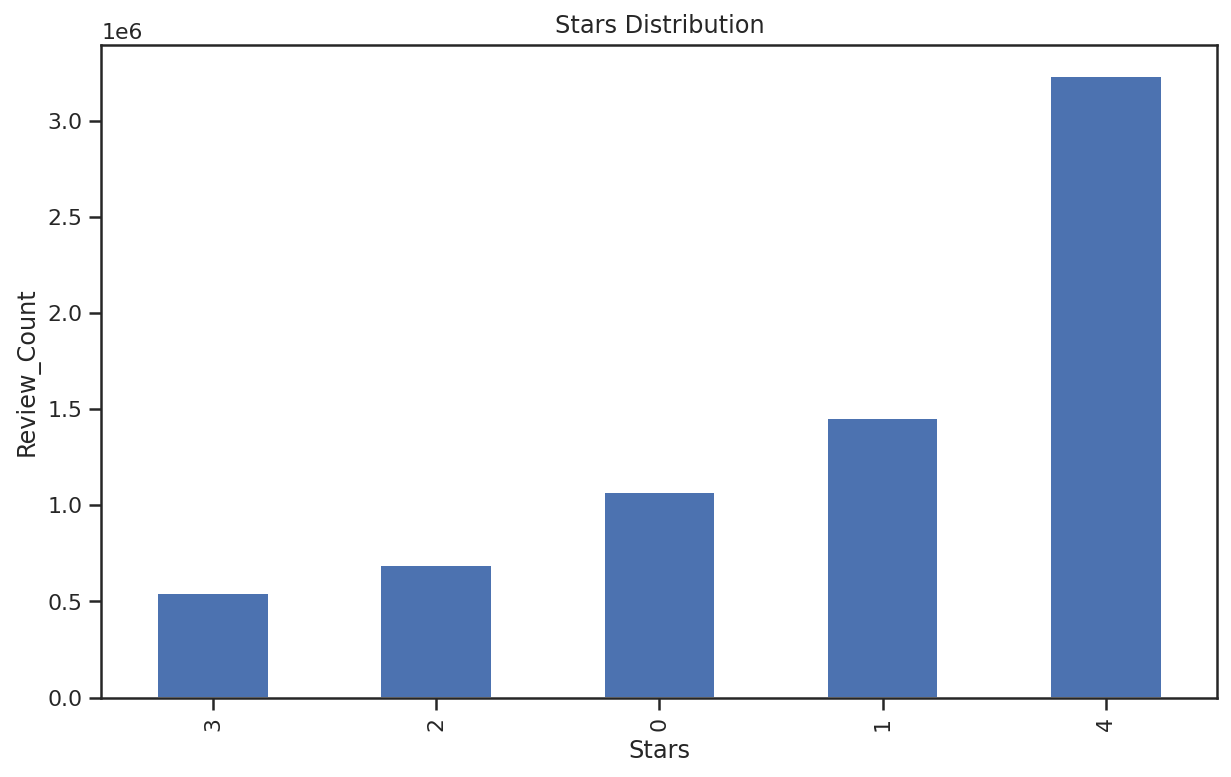

In [50]:
#Plotting 

# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
star_dist_plot['count'].plot(kind="bar", title="stars distribution")

plt.title("Stars Distribution")
plt.xlabel("Stars")
plt.ylabel("Review_Count")

#### User City

In [49]:
business_city = df_business.select('business_id','city')
review_bus_user  = df_review.select('business_id','user_id')
user_city = review_bus_user.join(business_city, 'business_id')
user_city.show()

+--------------------+--------------------+-------------+
|         business_id|             user_id|         city|
+--------------------+--------------------+-------------+
|XQfwVwDr-v0ZS3_Cb...|mh_-eMZ6K5RLWhZyI...|  North Wales|
|7ATYjTIgM3jUlt4UM...|OyoGAe7OKpv6SyGZT...| Philadelphia|
|YjUWPpI6HXG530lwP...|8g_iMtfSiwikVnbP2...|       Tucson|
|kxX2SOes4o-D3ZQBk...|_7bHUi9Uuf5__HHc_...| Philadelphia|
|e4Vwtrqf-wpJfwesg...|bcjbaE6dDog4jkNY9...|  New Orleans|
|04UD14gamNjLY0IDY...|eUta8W_HdHMXPzLBB...| Philadelphia|
|gmjsEdUsKpj9Xxu6p...|r3zeYsv1XFBRA4dJp...|  New Orleans|
|LHSTtnW3YHCeUkRDG...|yfFzsLmaWF2d4Sr0U...|   Quakertown|
|B5XSoSG3SfvQGtKEG...|wSTuiTk-sKNdcFypr...|Santa Barbara|
|gebiRewfieSdtt17P...|59MxRhNVhU9MYndMk...|Santa Barbara|
|uMvVYRgGNXf5boolA...|1WHRWwQmZOZDAhp2Q...|        Tampa|
|EQ-TZ2eeD_E0BHuvo...|ZbqSHbgCjzVAqaa7N...| Indianapolis|
|lj-E32x9_FA7GmUrB...|9OAtfnWag-ajVxRbU...|     St Louis|
|RZtGWDLCAtuipwaZ-...|smOvOajNG0lS4Pq7d...| Philadelphia|
|otQS34_MymijP

In [50]:
user_city_df = user_city.groupby('user_id','city')\
               .count()\
               .sort("count").orderBy(["count"], ascending=[0])\
               .show(10)


+--------------------+------------+-----+
|             user_id|        city|count|
+--------------------+------------+-----+
|0Igx-a1wAstiBDerG...| New Orleans| 1419|
|_BcWyKQL16ndpBdgg...|Philadelphia| 1397|
|ET8n-r7glWYqZhuR6...|Philadelphia| 1282|
|Xw7ZjaGfr0WNVt6s_...| New Orleans| 1237|
|bJ5FtCtZX3ZZacz2_...|Philadelphia| 1141|
|1HM81n6n4iPIFU5d2...| New Orleans| 1077|
|vHc-UrI9yfL_pnnc6...|        Reno|  977|
|wXdbkFZsfDR7utJvb...|Indianapolis|  878|
|fr1Hz2acAb3OaL3l6...|       Tampa|  857|
|CfX4sTIFFNaRchNsw...| New Orleans|  840|
+--------------------+------------+-----+
only showing top 10 rows



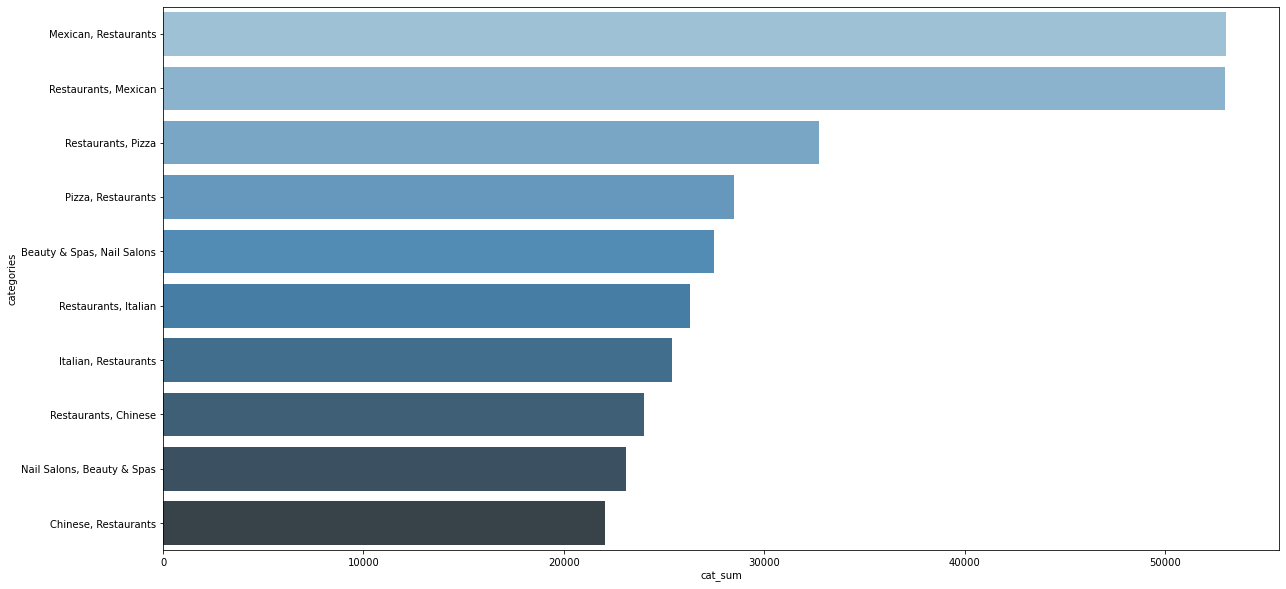

In [64]:
business_cat = df_business.select('business_id','review_count','categories')
cat_ct = business_cat.groupby('categories')\
         .agg(F.sum('review_count').alias('cat_sum'))\
         .sort("cat_sum").orderBy(["cat_sum"], ascending=[0])\
         .limit(10).toPandas()
              
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='cat_sum', y='categories',data=cat_ct, palette="Blues_d")

# Text Preprocessing

In [24]:
## remove special character: keeps only letters, space and numbers 
## PipeLine: Tokenization, stopword, word2vec, 

In [25]:
df_review.show()

+--------------------+-------------------+-----+--------------------+
|         business_id|               date|stars|                text|
+--------------------+-------------------+-----+--------------------+
|XQfwVwDr-v0ZS3_Cb...|2018-07-07 22:09:11|  3.0|If you decide to ...|
|7ATYjTIgM3jUlt4UM...|2012-01-03 15:28:18|  5.0|I've taken a lot ...|
|YjUWPpI6HXG530lwP...|2014-02-05 20:30:30|  3.0|Family diner. Had...|
|kxX2SOes4o-D3ZQBk...|2015-01-04 00:01:03|  5.0|Wow!  Yummy, diff...|
|e4Vwtrqf-wpJfwesg...|2017-01-14 20:54:15|  4.0|Cute interior and...|
|04UD14gamNjLY0IDY...|2015-09-23 23:10:31|  1.0|I am a long term ...|
|gmjsEdUsKpj9Xxu6p...|2015-01-03 23:21:18|  5.0|Loved this tour! ...|
|LHSTtnW3YHCeUkRDG...|2015-08-07 02:29:16|  5.0|Amazingly amazing...|
|B5XSoSG3SfvQGtKEG...|2016-03-30 22:46:33|  3.0|This easter inste...|
|gebiRewfieSdtt17P...|2016-07-25 07:31:06|  3.0|Had a party of 6 ...|
|uMvVYRgGNXf5boolA...|2015-06-21 14:48:06|  5.0|My experience wit...|
|EQ-TZ2eeD_E0BHuvo..

In [26]:
# remove special characters
from pyspark.sql.functions import regexp_replace, col

df_review=df_review.withColumn("text", regexp_replace(col("text"), "'/[^a-z0-9 ]+/i'", " "))

### Build pipeline for Tokenization, stopword, word2vec 

In [31]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import Word2Vec
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.feature import HashingTF, IDF


tokenizer = Tokenizer(inputCol="text", outputCol="words")  #tokenize words
remover = StopWordsRemover(inputCol="words", outputCol="filtered")  #remove stop words
word2Vec = Word2Vec(vectorSize=100, inputCol="filtered", outputCol="features")

### Implement Pipeline

In [ ]:
pipeline = Pipeline(stages=[tokenizer, remover, word2Vec])
df_review_nlp = pipeline.fit(df_review).transform(df_review)

22/03/08 02:23:56 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/03/08 02:23:56 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [ ]:
df_review_nlp.show()

+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+
|         business_id|               date|stars|                text|               words|            filtered|            features|
+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|2018-07-07 22:09:11|  3.0|If you decide to ...|[if, you, decide,...|[decide, eat, her...|[-0.0793677092985...|
|7ATYjTIgM3jUlt4UM...|2012-01-03 15:28:18|  5.0|I've taken a lot ...|[i've, taken, a, ...|[taken, lot, spin...|[-0.1070387071258...|
|YjUWPpI6HXG530lwP...|2014-02-05 20:30:30|  3.0|Family diner. Had...|[family, diner., ...|[family, diner., ...|[-0.0721996549051...|
|kxX2SOes4o-D3ZQBk...|2015-01-04 00:01:03|  5.0|Wow!  Yummy, diff...|[wow!, , yummy,, ...|[wow!, , yummy,, ...|[-0.0934847491153...|
|e4Vwtrqf-wpJfwesg...|2017-01-14 20:54:15|  4.0|Cute interior and...|

Review Analysis (Good/Bad)

In [282]:
df_review_aspect = df_review.withColumn("label", df_review["stars"].cast("double"))
df_review_aspect.show(5)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+-----+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|label|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+-----+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|  3.0|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|  5.0|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|  3.0|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|  5.0|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15| 